In [165]:
import pandas as pd
import matplotlib.pyplot as plt

1) Дан словарь слов русского языка.  Выделить группы слов, в которых используется одно и то же множество букв. Например, потоп – топ – пот. Результат сохранить в текстовый файл output.txt. В результирующий файл включать только такие группы слов (по одной группе в строке), в группе должно быть как минимум два слова. Программный код для решения этой задачи должен быть эффективным и словарь должен обрабатываться за приемлемое время.

In [166]:
groups = dict()
with open('slovar.txt', 'r') as fin:
    for word in fin:
        word = word.strip('\ufeff\n')
        key = ''.join(sorted(list(frozenset(word))))
        if key in groups:
            groups[key].append(word)
        else:
            groups[key] = [word]

with open('output.txt', 'w') as fout:
    for value in groups.values():
        if len(value) > 1:
            fout.write(' '.join(value) + '\n')

2) Посчитать частоту встречаемости слов в результирующем файле, упорядочить по частоте и первые 10 наиболее часто встречавшихся слов отразить на гистограмме.

<AxesSubplot: >

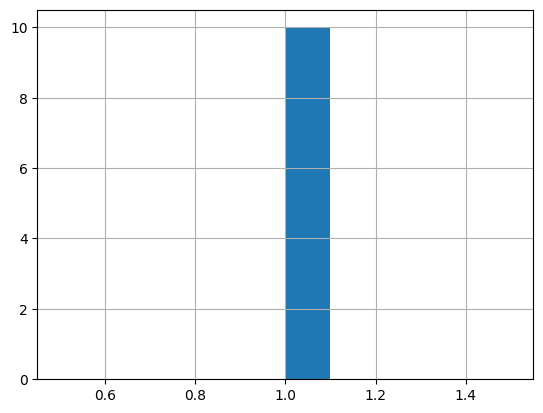

In [167]:
frequency = dict()
with open('output.txt', 'r') as fin:
    for words in fin:
        for word in words.strip().split(' '):
            if word in frequency:
                frequency[word] += 1
            else:
                frequency[word] = 1

frequency = pd.Series(frequency)
frequency.sort_values(ascending=False).head(10).hist()

3) Загрузите набор данных в DataFrame из файла 17 Результаты олимпиады.csv

In [168]:
olympiad_results = pd.read_csv('17 Результаты олимпиады.csv', sep=';')
olympiad_results

,"Фамилия,имя",Школа,Класс,A,B,C,D,Итого I тур,E,F,G,H,Итого II тур,Общий итог,Место,Unnamed: 15
0,Ученик 1,Школа 146,10,100.0,100.0,100.0,100.0,400,100.0,100.0,100.0,28.0,328,728,1,"Победитель,"
1,Ученик 2,Школа 9,11,100.0,100.0,100.0,33.0,333,100.0,100.0,100.0,44.0,344,677,2,"Победитель,"
2,Ученик 3,Школа 9,11,100.0,100.0,66.0,63.0,329,100.0,100.0,100.0,44.0,344,673,3,"Победитель,"
3,Ученик 4,Школа 146,11,100.0,100.0,100.0,63.0,363,100.0,68.0,100.0,28.0,296,659,4,"Призер,"
4,Ученик 5,Школа 9,11,100.0,100.0,66.0,63.0,329,100.0,100.0,49.0,28.0,277,606,5,"Призер,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Ученик 73,Школа 146,11,NaN,0.0,0.0,NaN,0,100.0,15.0,23.0,14.0,152,152,73,","
73,Ученик 74,Школа 9,9,48.0,26.0,NaN,NaN,74,25.0,0.0,21.0,NaN,46,120,74,","
74,Ученик 75,Школа 146,11,100.0,3.0,NaN,NaN,103,NaN,NaN,NaN,NaN,0,103,75,","
75,Ученик 76,Школа 146,11,48.0,3.0,NaN,NaN,51,NaN,NaN,NaN,NaN,0,51,76,","


4) Определите задачу, которая была решена наибольшим число участников на полный балл (100 баллов)

In [169]:
tasks = olympiad_results[['A','B','C','D','E','F','G','H']]
tasks[tasks == 100].count().sort_values(ascending=False)

A    67
E    64
B    20
F     7
C     4
G     4
D     1
H     0
dtype: int64

5) Для каждой задачи посчитайте средний балл среди всех, кто решал эту задачу. И определите наиболее сложную задачу - ту, для которой средний балл оказался наименьшим.

In [170]:
tasks.mean().sort_values()

H    16.363636
D    21.777778
F    27.344262
G    32.171875
C    33.609756
B    49.013158
A    94.453333
E    95.205479
dtype: float64

6) Постройте новый набор данных, в котором заполните пропущенные значения нулями и сохраните его в формате MS Excel.

In [220]:
data = pd.read_csv('17 Результаты олимпиады.csv', delimiter=';') #encoding='1251')
# ваш код
data.fillna(0, inplace=True)
data.rename(columns={'Unnamed: 15':'Статус'}, inplace=True) # переименовал столбец
data['Статус'] = data['Статус'].apply(lambda x: x[:str.find(x, ',')]) # убрал лишние запятые
data.loc[data['Школа'] == 'Гимназия 2 ', 'Школа'] = 'Гимназия 2' # исправлена опечатка в исходных данных
# data.to_excel('out.xlsx')

7) В исходный набор данных добавьте новый столбец, в котором для каждого участника олимпиады укажите сколько задач он решил на ненулевой балл.
Посчитайте корреляцию Пирсона между суммой баллов и количеством задач, решенных на ненулевой балл.

In [221]:
tasks = data[['A','B','C','D','E','F','G','H']]
data['solved_tasks'] = (tasks != 0).sum(axis=1)
data[['Общий итог', 'solved_tasks']].corr(method='pearson')
# data.columns

,Общий итог,solved_tasks
Общий итог,1.000000,0.830169
solved_tasks,0.830169,1.000000


8) Сформируйте новую таблицу из всех записей исходной таблицы, для каждой школы, участвовавшей в олимпиаде, отразите, сколько участников, сколько победителей и сколько призеров было от данной школы, каков максимальный, минимальный и средний балл участников олимпиады от данной школы. Отсортируйте полученную таблицу данных о школах по числу участников.

In [274]:
data['Школа'].unique()
participants = data.groupby("Школа")['Фамилия,имя'].count()
winners = data[data['Статус']=='Победитель'].groupby('Школа')['Статус'].count()
prize_winners = data[data['Статус']=='Призер'].groupby('Школа')['Статус'].count()
max_score = data.groupby(['Школа', 'Фамилия,имя'])['Общий итог'].max().unstack().max(axis=1)
min_score = data.groupby(['Школа', 'Фамилия,имя'])['Общий итог'].min().unstack().min(axis=1)
mean_score = data.groupby(['Школа', 'Фамилия,имя'])['Общий итог'].mean().unstack().mean(axis=1)

schools = pd.concat([participants, winners, prize_winners, max_score, min_score, mean_score], axis=1)
schools.columns = ['Количество участников','Количество победителей','Количество призеров','Минимальный балл','Максимальный балл','Средний балл']
schools.fillna(0, inplace=True)
schools = schools.astype({'Количество победителей': 'int','Количество призеров':'int'})
schools.sort_values(by='Количество участников', ascending=False, inplace=True)

9) Постройте круговую диаграмму, на которой отразите только те школы, которые подготовили победителей и призеров олимпиады. Обязательно должна быть легенда.

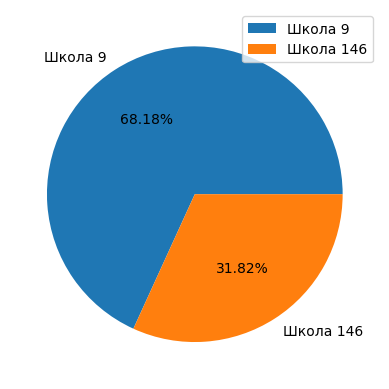

In [276]:
winners_schools = schools[(schools['Количество победителей'] > 0) & (schools['Количество призеров'] > 0)]
(winners_schools['Количество победителей']+winners_schools['Количество призеров']).plot(kind='pie',autopct='%1.2f%%')
plt.legend(loc='upper right')

10) Постройте график изменения количества задач, решенных на ненулевой балл. По оси X указывайте номер учеников, учеников при этом располагайте в порядке возрастания их суммарного балла за олимпиаду. На графике должны подписаны оси и подписан сам график.

<AxesSubplot: title={'center': 'Количество задач решенных на ненулевой балл каждым учеником'}, xlabel='Номер ученика', ylabel='Количества задач'>

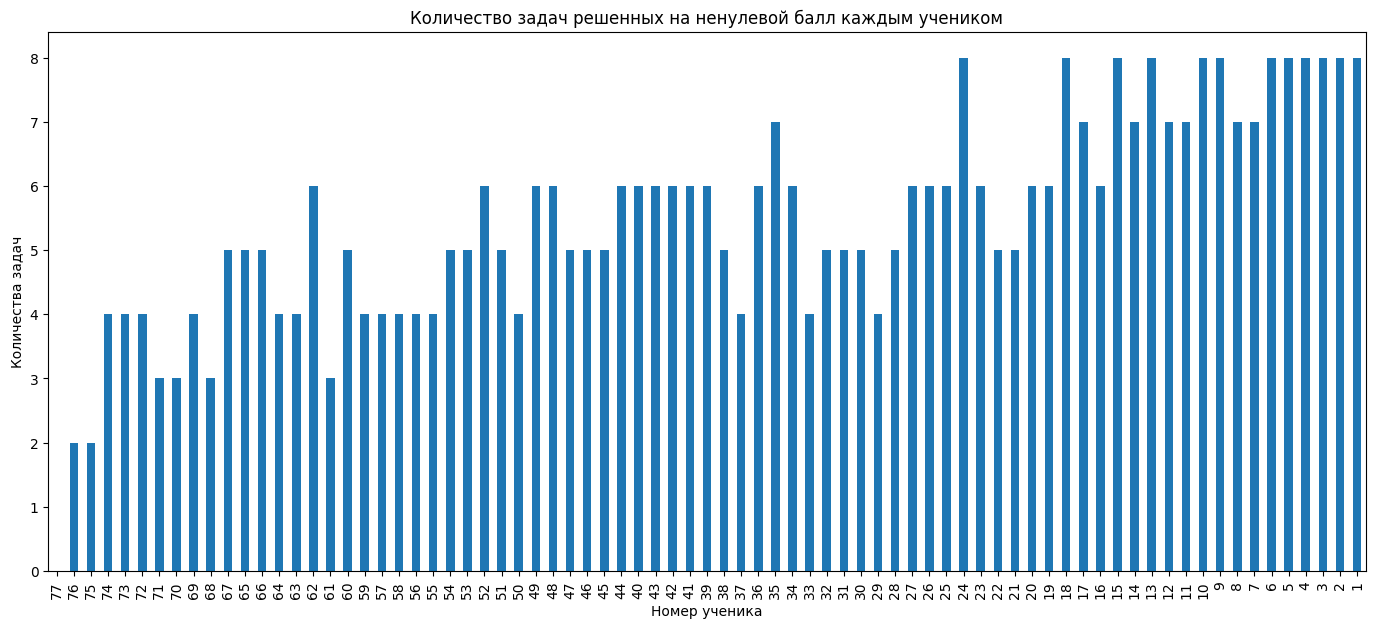

In [330]:
tasks = data[['A','B','C','D','E','F','G','H']]
data['Номер ученика'] = data['Фамилия,имя'].apply(lambda x: str.split(x)[1])
data.sort_values(by='Общий итог').plot(kind='bar', x='Номер ученика', y='solved_tasks', figsize=(17, 7), ylabel='Количества задач', title='Количество задач решенных на ненулевой балл каждым учеником', legend=False)